In [1]:
import pandas as pd
import numpy as np
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# import locale
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
# import warnings

from checkup_res import checkup_res

# warnings.filterwarnings("ignore")
# locale.setlocale(locale.LC_TIME,'')
pd.options.plotting.backend = "plotly"

In [2]:
data = pd.read_pickle("orders.pkl")
train = data['2021-01-04':'2021-10-10']
test = data["2021-10-11":]

/usr/lib64/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/lib64/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


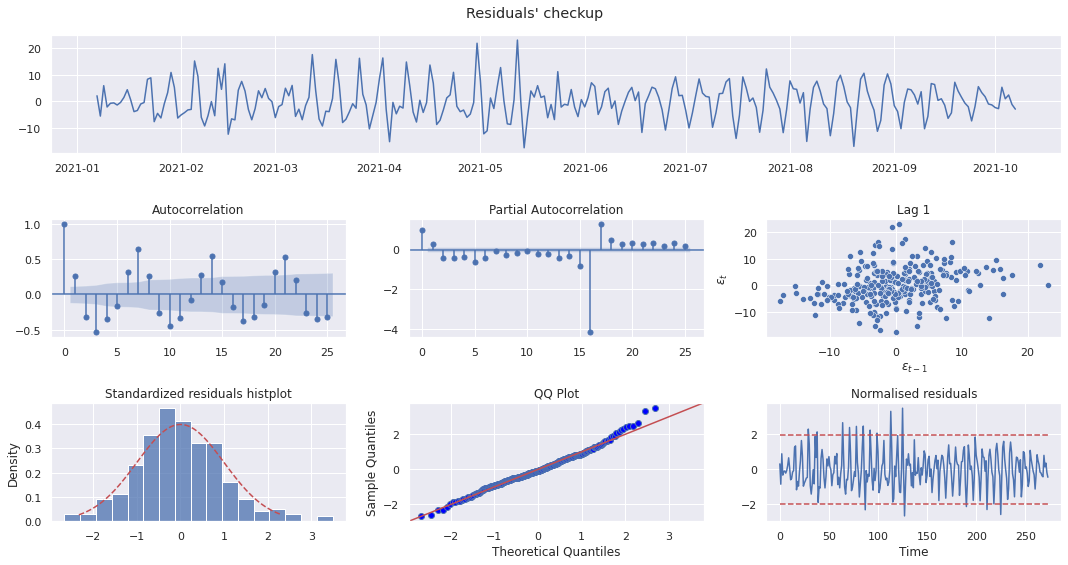

In [3]:
decomp = seasonal_decompose(train.n_orders, model='additive')
checkup_res(decomp.resid)

<ipython-input-4-6e214b117730>:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(ax2)


ValueError: Single argument to subplot must be a three-digit integer, not AxesSubplot(0.547727,0.536818;0.352273x0.343182)

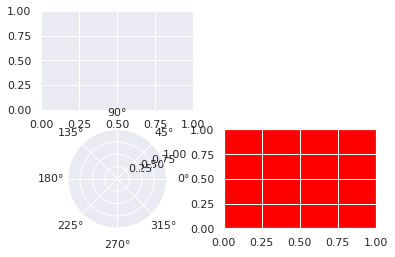

In [4]:
plt.subplot(221)

# equivalent but more general
ax1 = plt.subplot(2, 2, 1)

# add a subplot with no frame
ax2 = plt.subplot(222, frameon=False)

# add a polar subplot
plt.subplot(223, projection='polar')

# add a red subplot that shares the x-axis with ax1
plt.subplot(224, sharex=ax1, facecolor='red')

# delete ax2 from the figure
plt.delaxes(ax2)

# add ax2 to the figure again
plt.subplot(ax2)

# make the first axes "current" again
plt.subplot(221)

In [ ]:
decomp.resid

ds
2021-01-04 00:00:00+01:00         NaN
2021-01-05 00:00:00+01:00         NaN
2021-01-06 00:00:00+01:00         NaN
2021-01-07 00:00:00+01:00    2.044685
2021-01-08 00:00:00+01:00   -5.626414
                               ...   
2021-10-06 00:00:00+02:00   -1.249369
2021-10-07 00:00:00+02:00   -3.002934
2021-10-08 00:00:00+02:00         NaN
2021-10-09 00:00:00+02:00         NaN
2021-10-10 00:00:00+02:00         NaN
Freq: D, Name: resid, Length: 280, dtype: float64

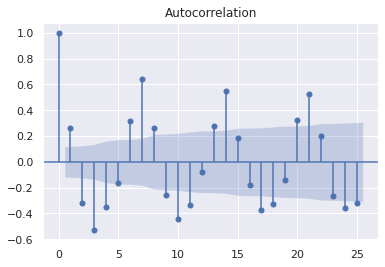

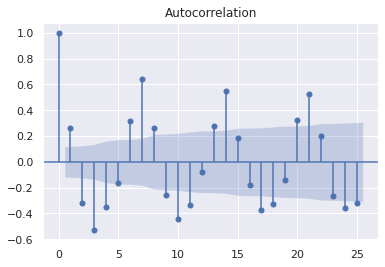

In [ ]:
plot_acf(decomp.resid.dropna())